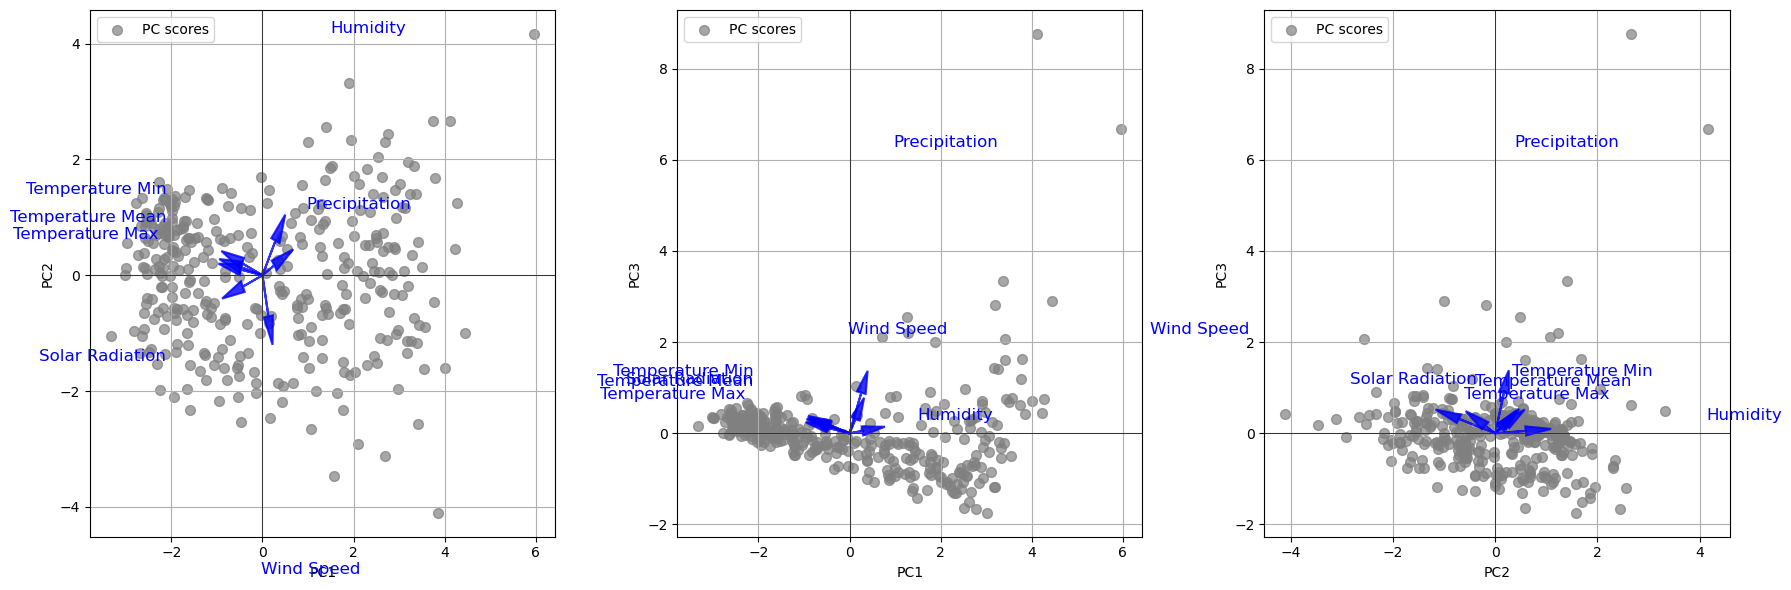

Eigenvalues and PC Values Table:
   Eigenvalues
0     4.256845
1     1.426737
2     0.806856
3     0.350529
4     0.166675
5     0.011413
6     0.000889

Loading Score Table:
                       PC1       PC2       PC3       PC4       PC5       PC6  \
Humidity          0.587364  0.713174  0.047798  0.322913 -0.206418  0.008265   
Solar Radiation  -0.890253 -0.233631  0.148381 -0.168228 -0.323992 -0.020623   
Temperature Mean -0.969080  0.166102  0.141742  0.106746  0.063506  0.004912   
Temperature Max  -0.983584  0.118113  0.107603  0.050361  0.021563  0.082158   
Temperature Min  -0.925185  0.248979  0.169037  0.200322  0.109273 -0.063970   
Wind Speed        0.269869 -0.847321  0.285508  0.360313 -0.026079  0.006860   
Precipitation     0.532867  0.205067  0.800498 -0.184580  0.044465  0.002477   

                       PC7  
Humidity         -0.000690  
Solar Radiation   0.000652  
Temperature Mean -0.024518  
Temperature Max   0.011436  
Temperature Min   0.012485  
Wind Speed

In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel file (update the path as needed)
file_path = r'D:\Thesis Work\charts\AgERA52.xlsx'
df_modified = pd.read_excel(file_path, sheet_name='Sheet1')

# Select the numerical variables for PCA
variables_modified = df_modified[['Humidity', 'Solar Radiation', 'Temperature Mean', 'Temperature Max',
                                  'Temperature Min', 'Wind Speed', 'Precipitation']]

# Standardize the data
scaler_modified = StandardScaler()
scaled_data_modified = scaler_modified.fit_transform(variables_modified)

# Perform PCA
pca_modified = PCA()
pca_data_modified = pca_modified.fit_transform(scaled_data_modified)

# Eigenvalues and PC Values Table
eigenvalues_modified = pca_modified.explained_variance_
pc_values_modified = pca_data_modified

# Loading scores (coefficients of the original variables)
loading_scores_modified = pca_modified.components_.T * np.sqrt(eigenvalues_modified)

# Covariance Matrix
cov_matrix_modified = np.cov(scaled_data_modified.T)

# Function to plot a clearer biplot with longer arrows
def biplot(score, coeff, pc_x=0, pc_y=1, labels=None, ax=None):
    ax.scatter(score[:, pc_x], score[:, pc_y], color='gray', s=50, alpha=0.7, label="PC scores")
    
    # Plot loadings (blue arrows)
    for i in range(coeff.shape[0]):
        ax.arrow(0, 0, coeff[i, pc_x], coeff[i, pc_y], color='blue', alpha=0.8, 
                 head_width=0.2, head_length=0.5, linewidth=1.5)
        ax.text(coeff[i, pc_x] * 8.15, coeff[i, pc_y] * 7.15, labels[i], 
                color='blue', ha='center', va='center', fontsize=12)
    
    ax.set_xlabel(f"PC{pc_x+1}")
    ax.set_ylabel(f"PC{pc_y+1}")
    ax.grid(True)
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.legend()

# Create subplots for the first three components
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the first two principal components in the first subplot
biplot(pca_data_modified, np.transpose(pca_modified.components_), 0, 1, labels=variables_modified.columns, ax=axes[0])

# Plot PC1 vs PC3 in the second subplot
biplot(pca_data_modified, np.transpose(pca_modified.components_), 0, 2, labels=variables_modified.columns, ax=axes[1])

# Plot PC2 vs PC3 in the third subplot
biplot(pca_data_modified, np.transpose(pca_modified.components_), 1, 2, labels=variables_modified.columns, ax=axes[2])

plt.tight_layout()
plt.show()

# Show tables and the biplot
eigenvalues_table_modified = pd.DataFrame(eigenvalues_modified, columns=["Eigenvalues"])
pc_values_table_modified = pd.DataFrame(pc_values_modified, columns=[f"PC{i+1}" for i in range(pc_values_modified.shape[1])])
loading_scores_table_modified = pd.DataFrame(loading_scores_modified, index=variables_modified.columns, columns=[f"PC{i+1}" for i in range(loading_scores_modified.shape[1])])
cov_matrix_table_modified = pd.DataFrame(cov_matrix_modified, index=variables_modified.columns, columns=variables_modified.columns)

# Print the tables
print("Eigenvalues and PC Values Table:")
print(eigenvalues_table_modified)

print("\nLoading Score Table:")
print(loading_scores_table_modified)

print("\nCovariance Matrix Table:")
print(cov_matrix_table_modified)